# Plotting univariate data in ggplot

Updating notebook 1 to also include `borough`.

### Python and R Setup

This setup allows you to use *Python* and *R* in the same notebook.

To set up a similar notebook, see quickstart instructions here:

https://github.com/dmil/jupyter-quickstart



In [2]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

### Import packages in R

In [4]:
%%R

require('tidyverse')


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


Loading required package: tidyverse


### Read data

In [5]:
%%R

# Read data
df <- read_csv('housing_data.csv')
df

Rows: 189 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): borough
dbl (11): zip, population, pct_hispanic_or_latino, pct_asian, pct_american_i...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 189 × 12
     zip population borough  pct_hispanic_or_latino pct_asian
   <dbl>      <dbl> <chr>                     <dbl>     <dbl>
 1 11368     112088 QUEENS                    76.5      11.6 
 2 11385     107796 QUEENS                    45.0       6.46
 3 11211     103123 BROOKLYN                  24.1       5.53
 4 11208     101313 BROOKLYN                  40.6       6.01
 5 10467     101255 BRONX                     52.1       5.68
 6 11236     100844 BROOKLYN                   7.66      2.58
 7 11226      99558 BROOKLYN                  16.4       3.07
 8 11373      94437 QUEENS                    41.7

### Histogram

👉 Try It

Grab your histogram code from the previous exercise (or just use the sample below) 

- modify the code to plot one histogram per borough 
- add a meaningful title and subtitle and axis labels

_(hint: this may require you to look up how `facet_wrap` works)._

In [ ]:
%%R

install.packages("ggthemes")

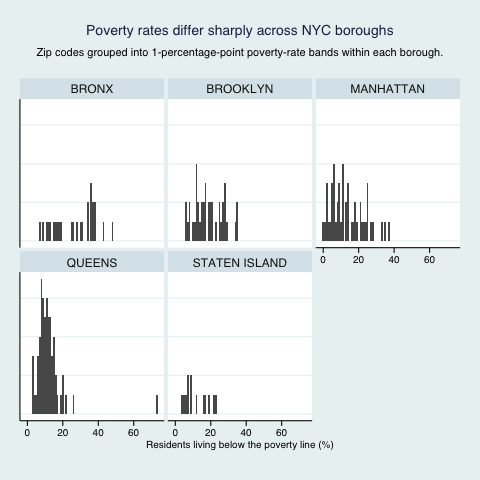

In [40]:
%%R 
library(ggthemes)

ggplot(df) + 
    aes(x=pct_below_poverty) +
    geom_histogram(binwidth=1) +
    theme_stata() + 
    theme(  
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(margin = margin(b = 20)) # pushes the chart down from the subtitle
    ) +
    labs(title = "Poverty rates differ sharply across NYC boroughs",
    subtitle = "Zip codes grouped into 1-percentage-point poverty-rate bands within each borough.", 
    x = "Residents living below the poverty line (%)"
    ) + 
    facet_wrap(~ borough)


### Dotplot

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might want to change the `y` aesthetic instead of using `facet_wrap`)._

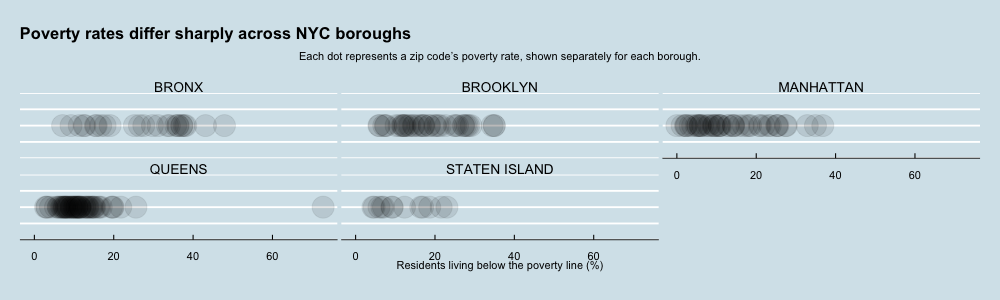

In [63]:
%%R -w 1000 -h 300

# DOING FACET_WRAP SO I CAN COMPARE

ggplot(df) + 
    aes(x=pct_below_poverty, y=1) +
    geom_point(alpha=.1, size=10) +
    theme_economist() + 
    theme(  
        axis.text.y = element_blank(),   # removes numbers
        axis.ticks.y = element_blank(),  # removes tick marks
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(margin = margin(b = 20)) # pushes the chart down from the subtitle
    ) +
    labs(title = "Poverty rates differ sharply across NYC boroughs",
    subtitle = "Each dot represents a zip code’s poverty rate, shown separately for each borough.", 
    x = "Residents living below the poverty line (%)"
    ) + 
    facet_wrap(~ borough)
    

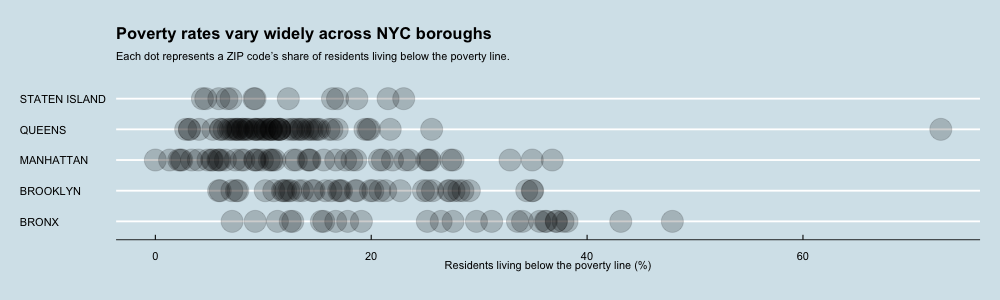

In [67]:
%%R -w 1000 -h 300

ggplot(df, aes(
  x = pct_below_poverty,
  y = borough
)) +
  geom_point(alpha=.2, size=10) +
  theme_economist() +
  labs(
    title = "Poverty rates vary widely across NYC boroughs",
    subtitle = "Each dot represents a ZIP code’s share of residents living below the poverty line.",
    x = "Residents living below the poverty line (%)"
  ) +
  theme(
    axis.title.y = element_blank(),   # removes label
    plot.title = element_text(hjust = 0, margin = margin(b = 10)),
    plot.subtitle = element_text(hjust = 0, margin = margin(b = 20)), 
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
  )

### Dotplot (with jitter)

👉 Try It

Grab your dotplot code from the previous exercise (or just use the sample below) 

- modify the code to plot one plot per borough 
- add a meaningful title and subtitle and axis labels

_(hint: you might also need to mess with the y axis, but also the colors of the dots)._

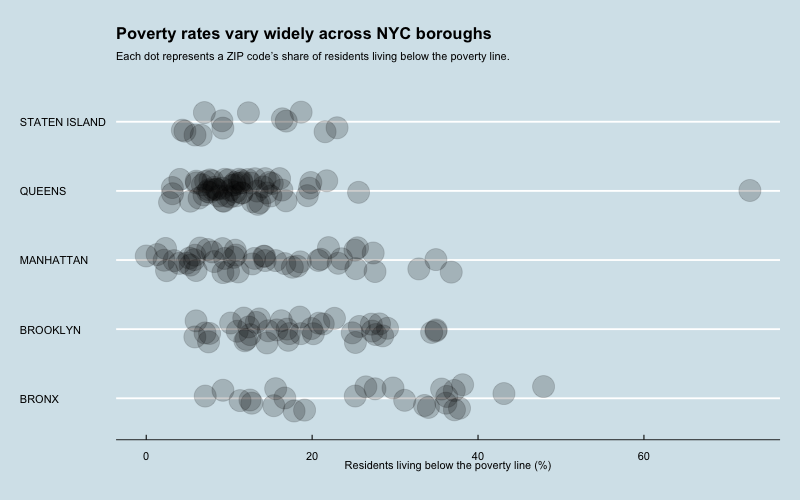

In [84]:
%%R -w 800 -h 500

ggplot(df) + 
    aes(x = pct_below_poverty,
    y = borough) +
    geom_jitter(height = 0.2, alpha = 0.2, size = 10) +
  theme_economist() +
  labs(
    title = "Poverty rates vary widely across NYC boroughs",
    subtitle = "Each dot represents a ZIP code’s share of residents living below the poverty line.",
    x = "Residents living below the poverty line (%)"
  ) +
  theme(
    axis.title.y = element_blank(),   # removes label
    plot.title = element_text(hjust = 0, margin = margin(b = 10)),
    plot.subtitle = element_text(hjust = 0, margin = margin(b = 20)), 
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
  )

### Density Plot

👉 Try It

Grab your density plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough


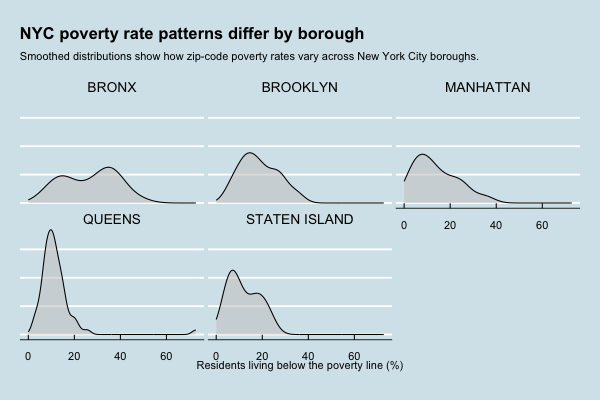

In [ ]:
%%R -w 600 -h 400

ggplot(df, aes(x = pct_below_poverty)) +
  geom_density(fill = "grey80", alpha = 0.6, adjust = 1) +
  theme_economist() +
  labs(
    title = "NYC poverty rate patterns differ by borough",
    subtitle = "Smoothed distributions show how zip-code poverty rates vary across New York City boroughs.",
    x = "Residents living below the poverty line (%)"
  ) +
  theme(
    axis.title.y = element_blank(),
    axis.text.y = element_blank(),   # removes numbers
    axis.ticks.y = element_blank(),  # removes tick marks
    plot.title = element_text(hjust = 0, margin = margin(b = 10)),
    plot.subtitle = element_text(hjust = 0, margin = margin(b = 20)),
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20) # increase side margins
  ) +
  facet_wrap(~ borough)

### Box and Whisker Plot
http://www.sthda.com/english/wiki/ggplot2-box-plot-quick-start-guide-r-software-and-data-visualization



👉 Try It

Grab your box and whisker plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

👉 Bonus
- see if you can annotate the biggest outlier

In [105]:
%%R

biggest_outlier <- df %>%
  filter(pct_below_poverty == max(pct_below_poverty, na.rm = TRUE)) %>%
  mutate(
    label = paste0(
      "ZIP ", zip, " (", borough, ")\n",
      round(pct_below_poverty, 1), "% below poverty"
    )
  )

biggest_outlier

# A tibble: 1 × 13
    zip population borough pct_hispanic_or_latino pct_asian
  <dbl>      <dbl> <chr>                    <dbl>     <dbl>
1 11430        206 QUEENS                    33.0      2.91
# ℹ 8 more variables: pct_american_indian_and_alaska_native <dbl>,
#   pct_black_or_african_american <dbl>, pct_white <dbl>,
#   pct_native_hawaiian_and_other_pacific_islander <dbl>,
#   pct_some_other_race <dbl>, pct_two_or_more_races <dbl>,
#   pct_below_poverty <dbl>, label <chr>


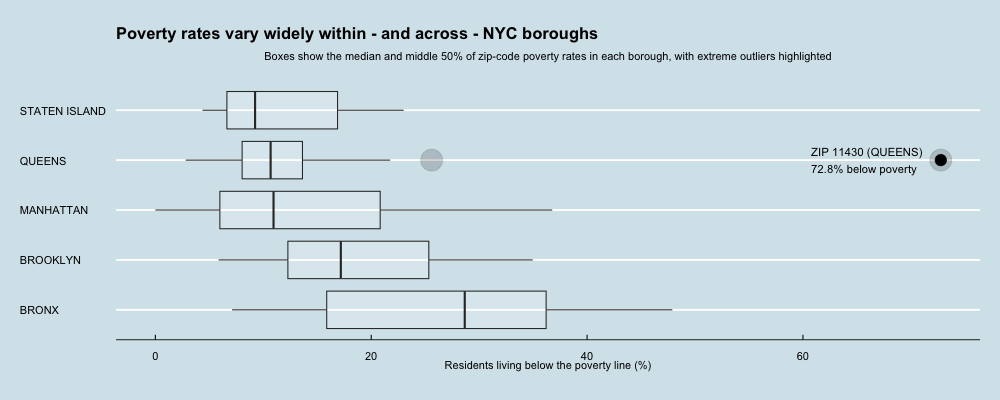

In [121]:
%%R -w 1000 -h 400

ggplot(df) + 
    aes(x=pct_below_poverty, y=borough) +
    geom_boxplot(alpha=.2,outlier.size=10) + 
    theme_economist() +
    labs(title = "Poverty rates vary widely within - and across - NYC boroughs", 
    subtitle = "Boxes show the median and middle 50% of zip-code poverty rates in each borough, with extreme outliers highlighted", 
    x = "Residents living below the poverty line (%)"
    ) +
    theme(  
        axis.title.y = element_blank(),   # removes label
        plot.margin = margin(t = 25, r = 20, b = 30, l = 20), # increase side margins
        plot.title = element_text(margin = margin(b = 10)), # pushes the subtitle down from the title
        plot.subtitle = element_text(margin = margin(b = 20)) # pushes the chart down from the subtitle
    ) + 

      # highlight the biggest outlier
    geom_point(
        data = biggest_outlier,
        aes(x = pct_below_poverty, y = borough),
        size = 5
    ) +
  
    # annotate it
    geom_text(
        data = biggest_outlier,
        aes(x = pct_below_poverty, y = borough, label = label),
        nudge_x = -12,      # push text to the right
        hjust = 0,
        size = 4
    )

### Violin Plot

👉 Try It

Grab your violin plot code from the previous exercise (or just use the sample below)

- modify the code to plot one plot per borough
- write about how this chart looks different from the box and whisker plot and for what purpose it may be more useful
> Distribution intensity is not visible within the box plots, but visible in violin plots. We can particularly see where the number of zip-codes pile up or start to thin out, and we can see more clearly if the distribution is skewed. We can also more clearly see if there are multiple clusters within a borough.

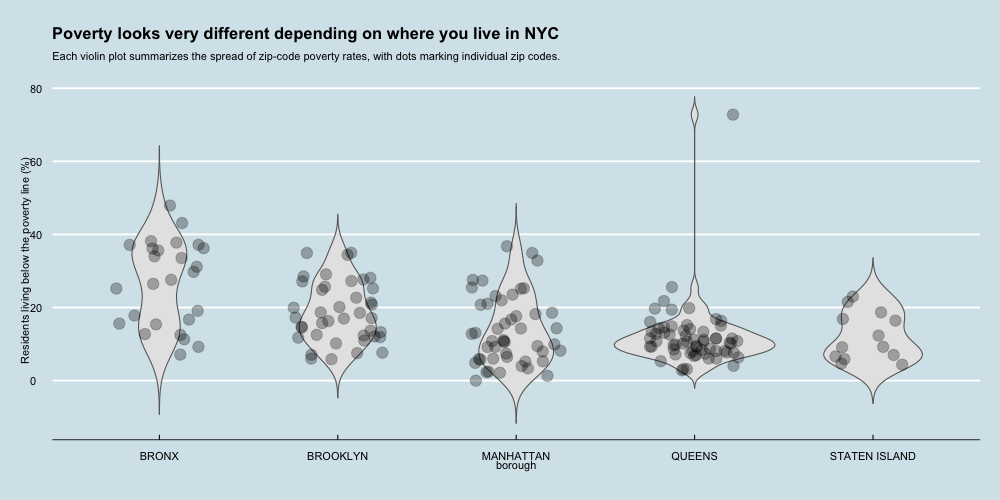

In [138]:
%%R -w 1000 -h 500

ggplot(df) + aes(x = pct_below_poverty, y = borough) +
  geom_violin(trim = FALSE, fill = "grey90", colour = "grey40") +
  geom_jitter(height = 0.25, alpha = 0.3, size = 5) +
  coord_flip() +
  theme_economist() +
  labs(
    title = "Poverty looks very different depending on where you live in NYC",
    subtitle = "Each violin plot summarizes the spread of zip-code poverty rates, with dots marking individual zip codes.",
    x = "Residents living below the poverty line (%)"
  ) +
  theme(
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20),
    plot.title = element_text(margin = margin(b = 10), hjust = 0),
    plot.subtitle = element_text(margin = margin(b = 20), hjust = 0)
  )

### Beeswarm 
👉 Bonus

Grab your beeswarm code from the previous exercise

- modify the code to plot one plot per borough
- add a title and subtitle that helps tell a story with this chart

In [ ]:
%%R

install.packages('ggbeeswarm')

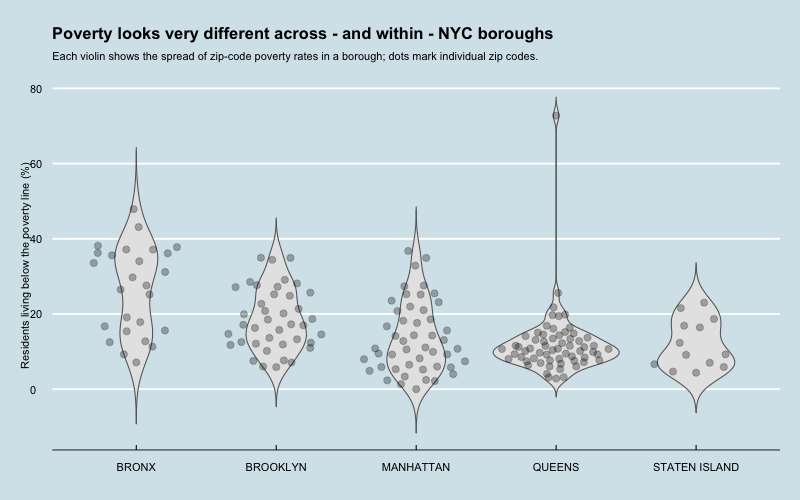

In [155]:
%%R -w 800 -h 500
library(ggbeeswarm)

ggplot(df, aes(x = borough, y = pct_below_poverty)) +
  geom_violin(trim = FALSE, fill = "grey90", colour = "grey40") +
  geom_quasirandom(alpha = 0.3, size = 3) +
  theme_economist() +
  labs(
    title = "Poverty looks very different across - and within - NYC boroughs",
    subtitle = "Each violin shows the spread of zip-code poverty rates in a borough; dots mark individual zip codes.",
    x = NULL,
    y = "Residents living below the poverty line (%)"
  ) +
  theme(
    plot.margin = margin(t = 25, r = 20, b = 30, l = 20),
    plot.title = element_text(margin = margin(b = 10), hjust = 0),
    plot.subtitle = element_text(margin = margin(b = 20), hjust = 0)
  )